Dataset: https://www.kaggle.com/c/titanic/overview

#### Pipeline: Clean Continuous Features

Pipeline: Clean Continuous Features
Using the Titanic dataset from this Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

Name (str) - Name of the passenger
Pclass (int) - Ticket class
Sex (str) - Sex of the passenger
Age (float) - Age in years
SibSp (int) - Number of siblings and spouses aboard
Parch (int) - Number of parents and children aboard
Ticket (str) - Ticket number
Fare (float) - Passenger fare
Cabin (str) - Cabin number
Embarked (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Read in Data

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('Dataset/titanic.csv')
# pd.read_csv("../data_folder/data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continuous variables
1. Fill in missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`SibSp`, `Parch`, `PassengerId`)

#### Fill missing for `Age`

In [31]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

#### Combine `SibSp` & `Parch`

<Figure size 432x288 with 0 Axes>

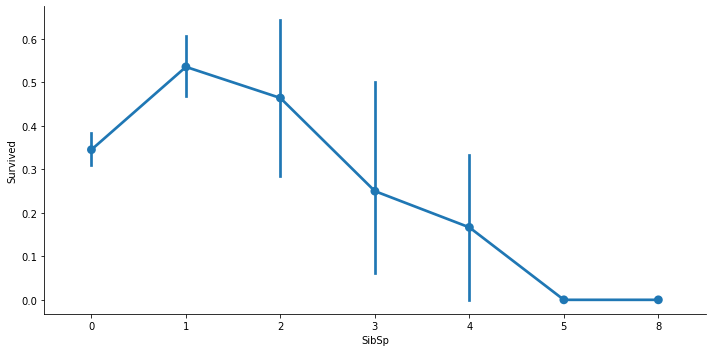

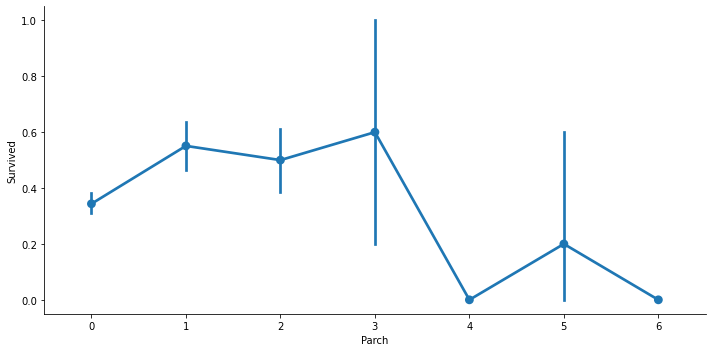

In [33]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [34]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnnecessary variables

In [35]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [36]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


### Write out cleaned data

In [37]:
titanic.to_csv('Dataset/titanic_cleaned.csv', index=False)

## Pipeline: Clean Categorical Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This notebook will implement some of the cleaning that was done in Section 2: EDA & Data Cleaning**

### Read in Data

In [38]:
import numpy as np
import pandas as pd

titanic = pd.read_csv('Dataset/titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables
1. Create an indicator variable in place of `Cabin`
2. Convert `Sex` to a numeric variable
3. Drop irrelevant/repetitive variables (`Cabin`, `Embarked`, `Name`, `Ticket`)

#### Create indicator for `Cabin`

In [39]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

#### Convert `Sex` to numeric

In [40]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)

#### Drop unnecessary variables

In [41]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Write out cleaned data

In [42]:
titanic.to_csv('Dataset/titanic_cleaned.csv', index=False)

## Pipeline: Split data into train, validation, and test set

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

### Read in Data

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('Dataset/titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Split into train, validation, and test set

In [44]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [45]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [46]:
len(X_train)

534

In [47]:
len(y_train)

534

### Write out data

In [49]:
X_train.to_csv('Dataset/train_features.csv', index=False)
X_val.to_csv('Dataset/val_features.csv', index=False)
X_test.to_csv('Dataset/test_features.csv', index=False)

y_train.to_csv('Dataset/train_labels.csv', index=False)
y_val.to_csv('Dataset/val_labels.csv', index=False)
y_test.to_csv('Dataset/test_labels.csv', index=False)

## Pipeline: Fit a basic model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a basic model using 5-fold Cross-Validation.

### Read in data

In [25]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# tr_features = pd.read_csv('../train_features.csv')
# tr_labels = pd.read_csv('../train_labels.csv', header=None)

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tr_features = pd.read_csv('Dataset/train_features.csv')
tr_labels = pd.read_csv('Dataset/train_labels.csv')

In [51]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)

In [52]:
scores

array([0.82242991, 0.82242991, 0.78504673, 0.80373832, 0.83018868])

## Pipeline: Tune hyperparameters

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will tune the hyperparameters for the basic model we fit in the last section.

### Read in data

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tr_features = pd.read_csv('Dataset/train_features.csv')
tr_labels = pd.read_csv('Dataset/train_labels.csv')

### Hyperparameter tuning

In [54]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [55]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.785 (+/-0.115) for {'max_depth': 2, 'n_estimators': 5}
0.798 (+/-0.114) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.105) for {'max_depth': 2, 'n_estimators': 100}
0.826 (+/-0.054) for {'max_depth': 10, 'n_estimators': 5}
0.83 (+/-0.049) for {'max_depth': 10, 'n_estimators': 50}
0.818 (+/-0.053) for {'max_depth': 10, 'n_estimators': 100}
0.79 (+/-0.066) for {'max_depth': 20, 'n_estimators': 5}
0.817 (+/-0.04) for {'max_depth': 20, 'n_estimators': 50}
0.813 (+/-0.031) for {'max_depth': 20, 'n_estimators': 100}
0.783 (+/-0.049) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0.038) for {'max_depth': None, 'n_estimators': 50}
0.811 (+/-0.013) for {'max_depth': None, 'n_estimators': 100}


## Pipeline: Evaluate results on validation set

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will use what we learned in last section to fit the best few models on the full training set and then evaluate the model on the validation set.

In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

tr_features = pd.read_csv('Dataset/train_features.csv')
tr_labels = pd.read_csv('Dataset/train_labels.csv')

val_features = pd.read_csv('Dataset/val_features.csv')
val_labels = pd.read_csv('Dataset/val_labels.csv')

te_features = pd.read_csv('Dataset/test_features.csv')
te_labels = pd.read_csv('Dataset/test_labels.csv')

### Fit best models on full training set

Results from last section:
    
```
BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.785 (+/-0.115) for {'max_depth': 2, 'n_estimators': 5}
0.798 (+/-0.114) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.105) for {'max_depth': 2, 'n_estimators': 100}
-->0.826 (+/-0.054) for {'max_depth': 10, 'n_estimators': 5}
-->0.83 (+/-0.049) for {'max_depth': 10, 'n_estimators': 50}
0.818 (+/-0.053) for {'max_depth': 10, 'n_estimators': 100}
0.79 (+/-0.066) for {'max_depth': 20, 'n_estimators': 5}
-->0.817 (+/-0.04) for {'max_depth': 20, 'n_estimators': 50}
0.813 (+/-0.031) for {'max_depth': 20, 'n_estimators': 100}
0.783 (+/-0.049) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0.038) for {'max_depth': None, 'n_estimators': 50}
0.811 (+/-0.013) for {'max_depth': None, 'n_estimators': 100}

```

In [60]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf2.fit(tr_features, tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=20)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier(max_depth=20, n_estimators=50)

In [61]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 5 -- A: 0.799 / P: 0.778 / R: 0.737
MAX DEPTH: 10 / # OF EST: 50 -- A: 0.821 / P: 0.844 / R: 0.711
MAX DEPTH: 20 / # OF EST: 50 -- A: 0.827 / P: 0.836 / R: 0.737


### Evaluate the best model on the test set

In [62]:
y_pred = rf3.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf3.max_depth,
                                                                     rf3.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 20 / # OF EST: 50 -- A: 0.781 / P: 0.71 / R: 0.677


In [63]:
y_pred = rf2.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.787 / P: 0.737 / R: 0.646
